<a href="https://colab.research.google.com/github/henrychinpc/Capstone-Project/blob/main/t_SNE_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import math
import numpy as np
import pandas as pd
import boto3
from fastai.vision import *
from fastai.metrics import error_rate

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [ ]:
pip install scikit-plot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls "/content/drive/My Drive/FECdataset.zip"

'/content/drive/My Drive/FECdataset.zip'


In [ ]:
!unzip "/content/drive/My Drive/FECdataset.zip"

In [ ]:
df = pd.read_csv('/content/drive/My Drive/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [ ]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
print(df.emotion.shape)

(35887,)


In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).astype('float32'))
img_array = np.stack(img_array, axis=0)
img_array_X = img_array /255.

In [ ]:
print(img_array)

[[ 70.  80.  82.  72. ...  95. 106. 109.  82.]
 [151. 150. 147. 155. ... 171. 193. 183. 184.]
 [231. 212. 156. 164. ...  97.  88. 110. 152.]
 [ 24.  32.  36.  30. ... 139. 142. 143. 142.]
 ...
 [178. 174. 172. 173. ...   0.   0.   0.   0.]
 [ 17.  17.  16.  23. ... 148. 154. 133. 113.]
 [ 30.  28.  28.  29. ...  35.  35.  30.  28.]
 [ 19.  13.  14.  12. ... 146. 189. 199. 201.]]


In [ ]:
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels.shape

(35887,)

In [ ]:
print(img_labels)

[0 0 2 4 ... 3 0 3 2]


In [ ]:
feat_cols = [ 'pixels'+str(i) for i in range(img_array_X.shape[1]) ]
df = pd.DataFrame(img_array_X,columns=feat_cols)
df['y'] = img_labels
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (35887, 2306)


In [ ]:
print(df)

       pixels0  pixels1  pixels2  pixels3  ...  pixels2302  pixels2303  y  label
0         70.0     80.0     82.0     72.0  ...       109.0        82.0  0      0
1        151.0    150.0    147.0    155.0  ...       183.0       184.0  0      0
2        231.0    212.0    156.0    164.0  ...       110.0       152.0  2      2
3         24.0     32.0     36.0     30.0  ...       143.0       142.0  4      4
4          4.0      0.0      0.0      0.0  ...        29.0        30.0  6      6
...        ...      ...      ...      ...  ...         ...         ... ..    ...
35882     50.0     36.0     17.0     22.0  ...       221.0       216.0  6      6
35883    178.0    174.0    172.0    173.0  ...         0.0         0.0  3      3
35884     17.0     17.0     16.0     23.0  ...       133.0       113.0  0      0
35885     30.0     28.0     28.0     29.0  ...        30.0        28.0  3      3
35886     19.0     13.0     14.0     12.0  ...       199.0       201.0  2      2

[35887 rows x 2306 columns]

In [ ]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

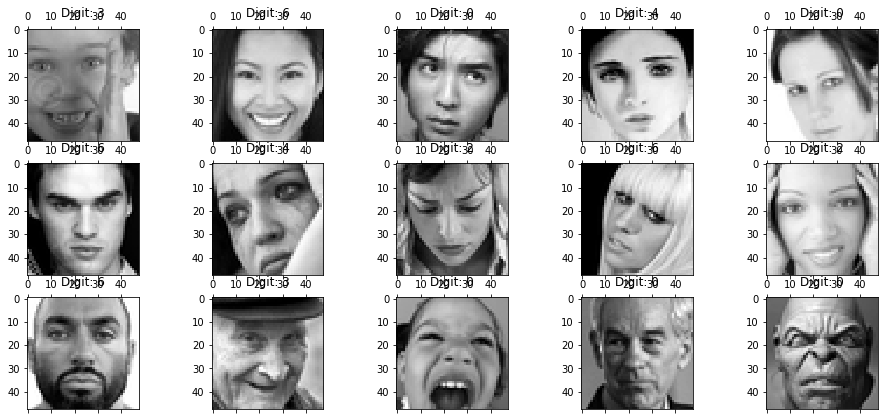

In [ ]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((48,48)).astype(float))
plt.show()

In [ ]:
pca = PCA(n_components=100)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
# df['pc4'] = 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.289265 0.098024 0.094255 0.055053 ... 0.0007   0.000696 0.00068  0.000663]


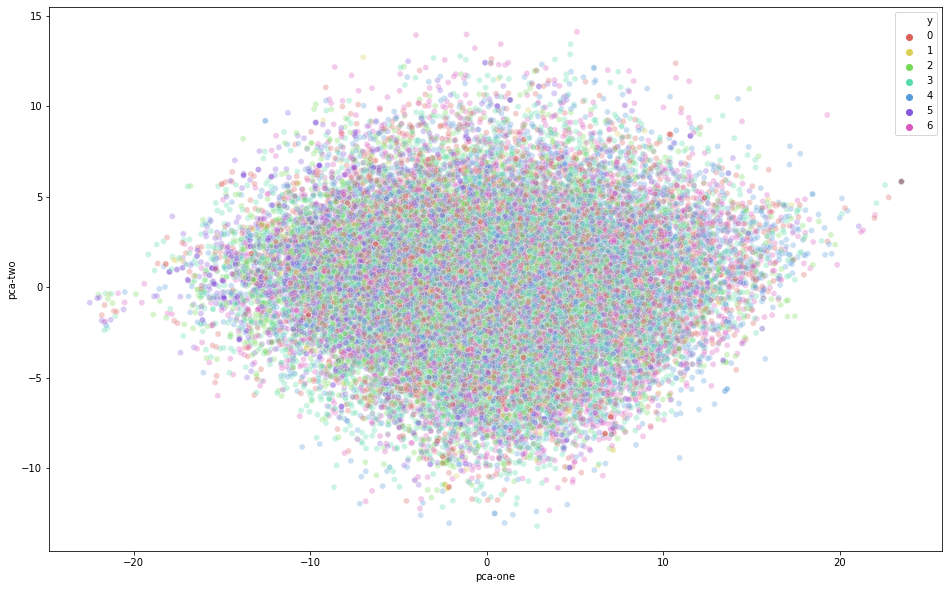

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

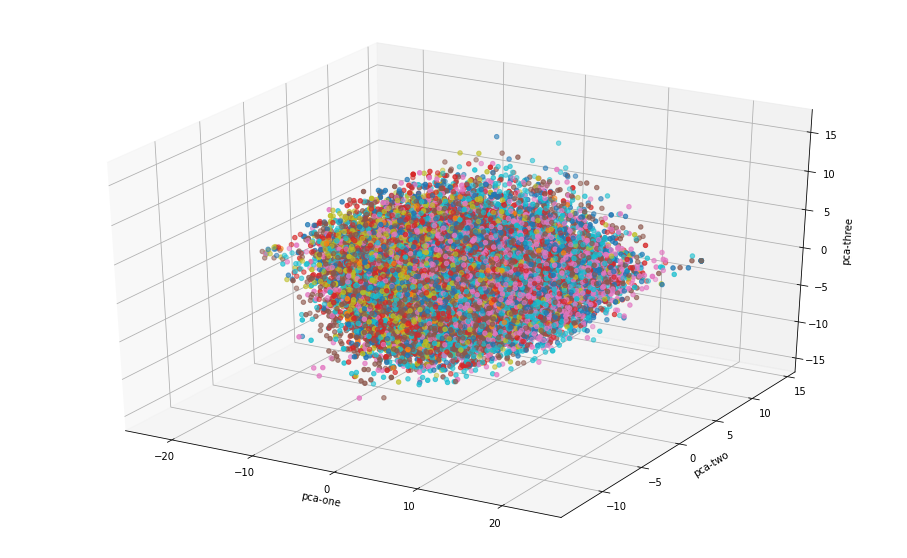

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()